# Global Thresholding Example
This notebook depicts a standard global thresholding protocol. This includes first loading the image, performing a smoothing operation using a Gaussian kernel, then providing a single value for thresholding the image.

For a short-hand reference, see the summary at the bottom of the notebook.

## Example with Visuals
Be sure to install example dependencies if following along:
```bash
pip install matplotlib
```

In [1]:
import ctpros
import matplotlib.pyplot as plt # for basic slice viewing

First we begin with loading a test `*.aim*` file into memory and visualize with Matplotlib's `imshow`.

Loading test_v3.aim;1: 100%|██████████| 46/46 [00:00<00:00, 482.78it/s]

AIM(shape = (46, 28, 31), dtype = int16)



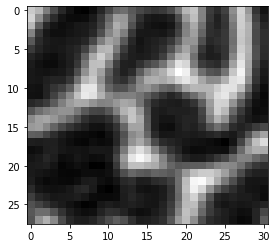

In [2]:
aim = ctpros.NDArray("../data/input/test_v3.aim;1").load()
print(aim)
plt.imshow(aim[20],cmap="gray") # arbitrarily looking at 20th slice of image

Note the range of values demonstrated as a gradient of intensity. Also note for that the default dtype or datatype of the AIM file is `int16` or a signed 16-bit integer which ranges in values from `-32768` to `32767`.

AIM(shape = (46, 28, 31), dtype = uint8)


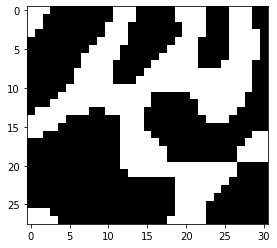

In [3]:
aim.filter.gauss(1.2,2) # equivalently aim.filter.gauss(sigma=1.2,support=2), smoothing the image
aim.classify.threshold(6500) # thresholds the image by the provided value
print(aim)
plt.imshow(aim[20],cmap="gray") # reviewing results at the same location

Note now that the dtype of the AIM data is `uint8` or unsigned 8-bit integer, ranging from `0` to `255`. If we want to save the data back to disk, it must be compliant with the file type's IO protocol, which can be tested as so:

In [4]:
aim.validforIO()


Expected dtype to be: ['int8', 'int16'], but received uint8


False

As shown above, only `int8` and `int16` data types are permissible AIM data types. We will convert this AIM to `int8` by using one of many approaches available through NumPy's API.

In [5]:
aim.dtype = 'int8' # which maps [128,255] to [-128,-1]
aim.validforIO()

True

Saving the image can be followed up like so:
```
aim.saveas("path/to/test_v3_thresh.aim;1")
```

Or alternatively overwritten from its original file location:
```
aim.save()
```

## Summary

```python
import ctpros

# Example parameters
filename = 'path/to/file.aim;1'
savename = 'path/to/file_thresh.aim;1'
sigma, support = 1.2, 2
threshold = 6500

# Workflow
aim = ctpros.AIM(filename).load()
aim.filter.gaussian(sigma,support)
aim.classify.threshold(threshold)
aim.saveas(savename)
```